# About Dataset and Code

- [Website](https://archive.ics.uci.edu/ml/datasets/auto+mpg)
- Keras for general machine learning

## Importing the data

In [96]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers

In [97]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [102]:
file = "auto-mpg.txt"

In [99]:
column_names = ['MPG', 'Cylinders', 'Displacement', 
                'Horsepower', 'Weight', 'Acceleration', 
                'Model Year', 'Origin']

data = pd.read_csv(file, names=column_names, 
                          na_values="?", comment="\t", 
                          sep=" ", skipinitialspace=True)
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [103]:
# ? --> NaN bc of param : na_values
data.head(35)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [56]:
# can make adjustments to the copy and it won't modify the original
dataset = data.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


---

### Playing with data using pandas
- Not required to run

In [ ]:
dataset.info()

In [ ]:
dataset.shape

In [ ]:
# pd.set_option('display.max_rows', 398)
dataset

### End of playing with data
---

In [57]:
# drop NAN values
dataset_with_na = dataset
dataset_drop_na = dataset.dropna()
print("w/ NANs shape : ", dataset_with_na.shape, "vs dropped NANs shape: ", dataset_drop_na.shape)

w/ NANs shape :  (398, 8) vs dropped NANs shape:  (392, 8)


In [58]:
####### DONT RUN #######
# One-hot encoding : 1 is on (also called firing) and 2 is off (also called not firing)
# use the pop method to get the col we want to apply one-hot encoding to
# remove Origin as a col and add the 3 countries along w/ their one-hot encoding value

# origin = dataset.pop('Origin')

# 1s are USA, 2s are Europe, 3s are Japan
# dataset['USA'] = (origin == 1) * 1.0
# dataset['Europe'] = (origin == 2) * 1.0
# dataset['Japan'] = (origin == 3) * 1.0

# dataset.tail()

--- 

### Playing with One-hot encoding
- Replace the above w/ the below

In [59]:
# origin = dataset_drop_na['Origin']
# origin

origin = dataset_drop_na.loc[0:, ['Origin']] 
print(origin)

     Origin
0         1
1         1
2         1
3         1
4         1
..      ...
393       1
394       2
395       1
396       1
397       1

[392 rows x 1 columns]


In [60]:
# Get np arr of unique values, get shape w/ np, get size w/ py, get np arr of unique values, .T for viewing purposes
type(origin), type(origin.values), np.shape(origin.values.T), origin.values.size, origin.values.T

(pandas.core.frame.DataFrame,
 numpy.ndarray,
 (1, 392),
 392,
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
         2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3,
         3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 2,
         2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
         1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3,
         2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 3, 3, 1, 3, 1, 1, 3, 2, 2

In [61]:
unique_values = origin['Origin'].value_counts()
print("\ncounts of each unique value : \n", unique_values)


unique_values_keys = unique_values.keys()
print("unique_values_keys : ", unique_values_keys)

total_unique_values = len(unique_values.keys())
print("\ntotal_unique_values : ", total_unique_values)


counts of each unique value : 
 1    245
3     79
2     68
Name: Origin, dtype: int64
unique_values_keys :  Int64Index([1, 3, 2], dtype='int64')

total_unique_values :  3


In [62]:
origin = dataset_drop_na.pop('Origin')
countries = ['USA', 'Europe', 'Japan']

usa = countries[0]
dataset_drop_na[usa] = (origin == unique_values_keys[0]) * 1.0
dataset_drop_na[usa]

europe = countries[1]
dataset_drop_na[europe] = (origin == unique_values_keys[2]) * 1.0
dataset_drop_na[europe]

japan = countries[2]
dataset_drop_na[japan] = (origin == unique_values_keys[1]) * 1.0
dataset_drop_na[japan]


one_hot_df = dataset_drop_na.loc[0:, countries]
one_hot_df

dataset_drop_na

/Users/brinkley97/opt/anaconda3/envs/auto_mpg_dataset/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/brinkley97/opt/anaconda3/envs/auto_mpg_dataset/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/brinkley97/opt/anaconda3/envs/auto_mpg_dataset/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


### End of playing with One-hot encoding

---

## Splitting the data

In [63]:
# .sample returns a random sample of items from an axis of object; 
# lower frac more data and vice versa
# frac is a fraction of axis items to return as in get x% of this data
    # here, train w/ 80%
# random_state to ensure the reproducibility of the examples.
train_data = dataset_drop_na.sample(frac=0.8, random_state=0)
train_data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1.0,0.0,0.0
229,16.0,8,400.0,180.0,4220.0,11.1,77,1.0,0.0,0.0
150,26.0,4,108.0,93.0,2391.0,15.5,74,0.0,0.0,1.0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0.0,0.0,1.0


In [64]:
# here, train w/ 80% and test w/ 20% = 100% - drop(80%) 
get_remaining_data = train_data.index
test_data = dataset_drop_na.drop(get_remaining_data)
test_data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88.0,2395.0,18.0,82,1.0,0.0,0.0
375,36.0,4,105.0,74.0,1980.0,15.3,82,0.0,1.0,0.0
382,34.0,4,108.0,70.0,2245.0,16.9,82,0.0,0.0,1.0
384,32.0,4,91.0,67.0,1965.0,15.7,82,0.0,0.0,1.0


In [65]:
# total_data_no_nans = train_data + test_data
# total_data_no_nans.shape == dataset_drop_na.shape

In [66]:
# separate the MPG label from the train and test data
train_labels = train_data.pop('MPG')
# train_labels = train_data['MPG']
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [67]:
# separate the MPG label from the train and test data
test_labels = test_data.pop('MPG')
# test_labels = test_data['MPG']
test_labels

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64

## Standardizing the data

- Normalizing the data such that the values fit between a certain range such as 0 and 1 or -1 and +1
- I believe both norms are wrong bc values should be between

In [79]:
def normalization(x):
    # print(x)
    # scalar = preprocessing.StandardScaler().fit(x)
    # print("scalar : ", scalar)
#     mean = scalar.mean_
#     print("mean : ", mean)
#     scale = scalar.scale_
#     print("scale : ", scale)
    
    # x_scaled = scalar.transform(x)
    # # print("x_scaled : ", x_scaled)
    # x_scaled_mean = x_scaled.mean(axis=1)
    # print("x_scaled_mean : ", x_scaled_mean)
    # x_scaled_std = x_scaled.std(axis=0)
    # print("x_scaled_std : ", x_scaled_std)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_min_max = min_max_scaler.fit_transform(x)
    
    return x_min_max

In [80]:

normed_trained_data = normalization(train_data)
normed_trained_data

array([[0.2       , 0.05684755, 0.16201117, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.18604651, 0.23463687, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.72868217, 0.63687151, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.10335917, 0.26256983, ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.03875969, 0.08379888, ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.10077519, 0.22346369, ..., 0.        , 1.        ,
        0.        ]])

In [81]:
normed_test_data = normalization(test_data)
normed_test_data

array([[1.        , 0.96969697, 0.78021978, 0.71401213, 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.87878788, 0.91758242, 0.95818704, 0.40145985,
        0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.70909091, 0.7967033 , 0.99553144, 0.72992701,
        0.        , 1.        , 0.        , 0.        ],
       [0.2       , 0.13030303, 0.25824176, 0.19629748, 0.40145985,
        0.08333333, 0.        , 0.        , 1.        ],
       [0.6       , 0.49090909, 0.28571429, 0.32588573, 0.32846715,
        0.08333333, 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.6978022 , 0.90999042, 0.2189781 ,
        0.08333333, 1.        , 0.        , 0.        ],
       [1.        , 0.85151515, 0.57692308, 0.81104373, 0.3649635 ,
        0.08333333, 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.67032967, 1.        , 0.25547445,
        0.08333333, 1.        , 0.        , 0.        ],


- RMSprop is a keras class that : 
    - Maintain a moving (discounted) average of the square of gradients
    - Divide the gradient by the root of this average
- Play around w/ relu, softmax, etc

In [131]:
def model_building():
    model = keras.Sequential([
            layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
            layers.Dense(64, activation=tf.nn.sigmoid), layers.Dense(1)
    ])
    
    # optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.SGD(0.001)
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [132]:
model = model_building()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


---

## Training the model

In [133]:
class PrintDot(keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs): 
        if epoch % 100 == 0: print('')
        print('.', end='')

In [134]:
EPOCHS = 1000

In [135]:
history = model.fit(normed_trained_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, 
                    verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [136]:
hist = pd.DataFrame(history.history)
hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,450.581463,19.668194,450.581451,356.191476,17.182001,356.191467
1,276.047409,14.679233,276.047394,222.439208,12.703208,222.439209
2,172.373399,10.664886,172.373398,143.600712,9.636905,143.600708
3,113.717731,8.184939,113.717728,100.959513,7.994409,100.959511
4,83.366852,7.039731,83.366852,78.541615,7.194603,78.541618
...,...,...,...,...,...,...
995,6.644886,1.837005,6.644886,7.802149,2.135550,7.802149
996,6.624223,1.825744,6.624223,7.722876,2.101501,7.722875
997,6.635926,1.830941,6.635926,7.705685,2.097765,7.705685
998,6.621616,1.831333,6.621616,7.705246,2.100555,7.705245


In [137]:
hist['epoch'] = history.epoch

# only to see
# np.array(history.epoch) == np.array(hist['epoch'])

In [138]:
# Get the last 5 of the hist DF
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,6.644886,1.837005,6.644886,7.802149,2.135550,7.802149,995
996,6.624223,1.825744,6.624223,7.722876,2.101501,7.722875,996
997,6.635926,1.830941,6.635926,7.705685,2.097765,7.705685,997
998,6.621616,1.831333,6.621616,7.705246,2.100555,7.705245,998
999,6.694171,1.839767,6.694170,7.741012,2.113050,7.741012,999


In [139]:
def plot_training_history(history): 
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

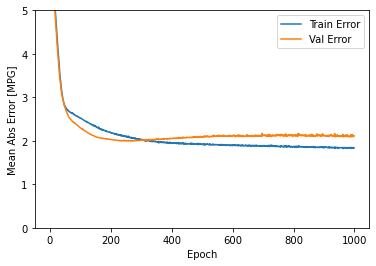

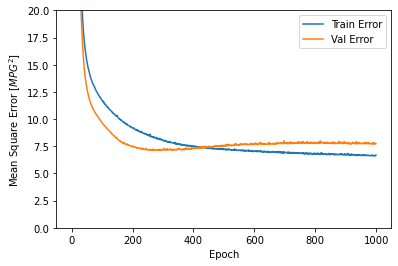

In [140]:
plot_training_history(history)


....................................................................................................
....................................................................................................
...................................................................................................

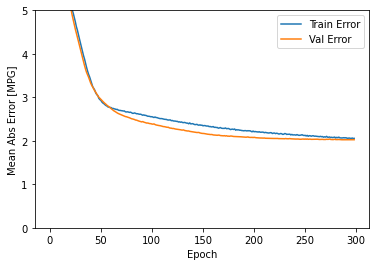

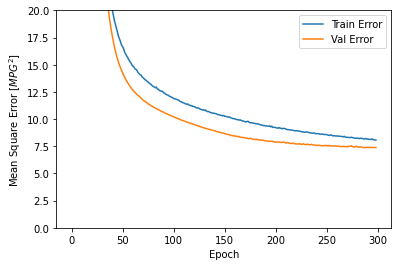

In [141]:
model = model_building()
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_trained_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0,
callbacks=[early_stop, PrintDot()])
plot_training_history(history)

In [142]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing dataset Mean Abs Error(MAE): {:5.2f} MPG".format(mae))

Testing dataset Mean Abs Error(MAE):  2.00 MPG


---

## Predicting new, unseen data

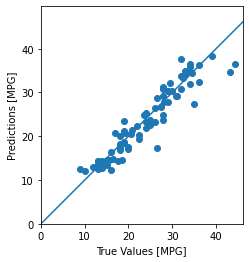

In [143]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]]) 
plt.ylim([0,plt.ylim()[1]]) 
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

---

## Evaluating the model's performance

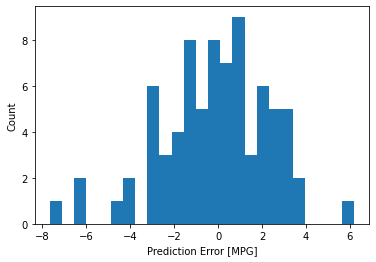

In [95]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
plt.show()